In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/loan_data.csv")

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.shape

(9578, 14)

In [8]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [12]:
columns_to_drop = ["purpose", "days.with.cr.line", "revol.bal", "delinq.2yrs", "pub.rec"]
df = df.drop(columns=columns_to_drop)

In [19]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,revol.util,inq.last.6mths,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,52.1,0,0
1,1,0.1071,228.22,11.082143,14.29,707,76.7,0,0
2,1,0.1357,366.86,10.373491,11.63,682,25.6,1,0
3,1,0.1008,162.34,11.350407,8.10,712,73.2,1,0
4,1,0.1426,102.92,11.299732,14.97,667,39.5,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit.policy   9578 non-null   int64  
 1   int.rate        9578 non-null   float64
 2   installment     9578 non-null   float64
 3   log.annual.inc  9578 non-null   float64
 4   dti             9578 non-null   float64
 5   fico            9578 non-null   int64  
 6   revol.util      9578 non-null   float64
 7   inq.last.6mths  9578 non-null   int64  
 8   not.fully.paid  9578 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 673.6 KB


In [14]:
df.nunique()

credit.policy        2
int.rate           249
installment       4788
log.annual.inc    1987
dti               2529
fico                44
revol.util        1035
inq.last.6mths      28
not.fully.paid       2
dtype: int64

In [15]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,revol.util,inq.last.6mths,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,46.799236,1.577469,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,29.014417,2.200245,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,22.600000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,46.300000,1.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,70.900000,2.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,119.000000,33.000000,1.000000


In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.util', 'inq.last.6mths', 'not.fully.paid']

We have 0 categorical features : []


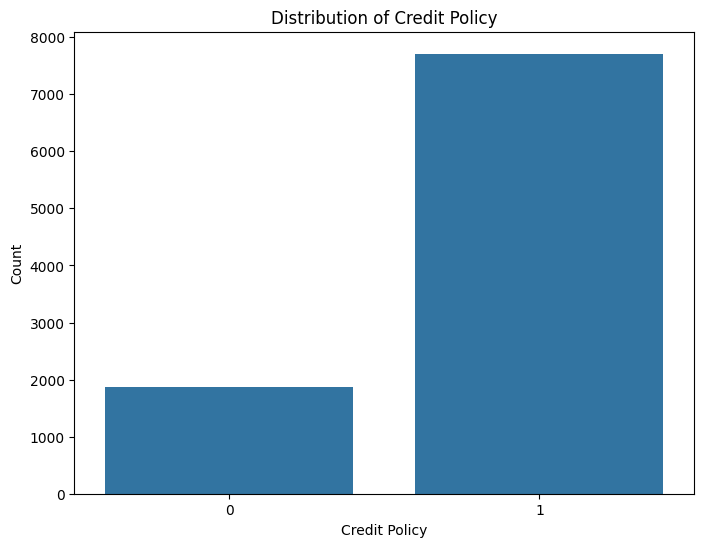

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='credit.policy', data=df)
plt.title('Distribution of Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.show()

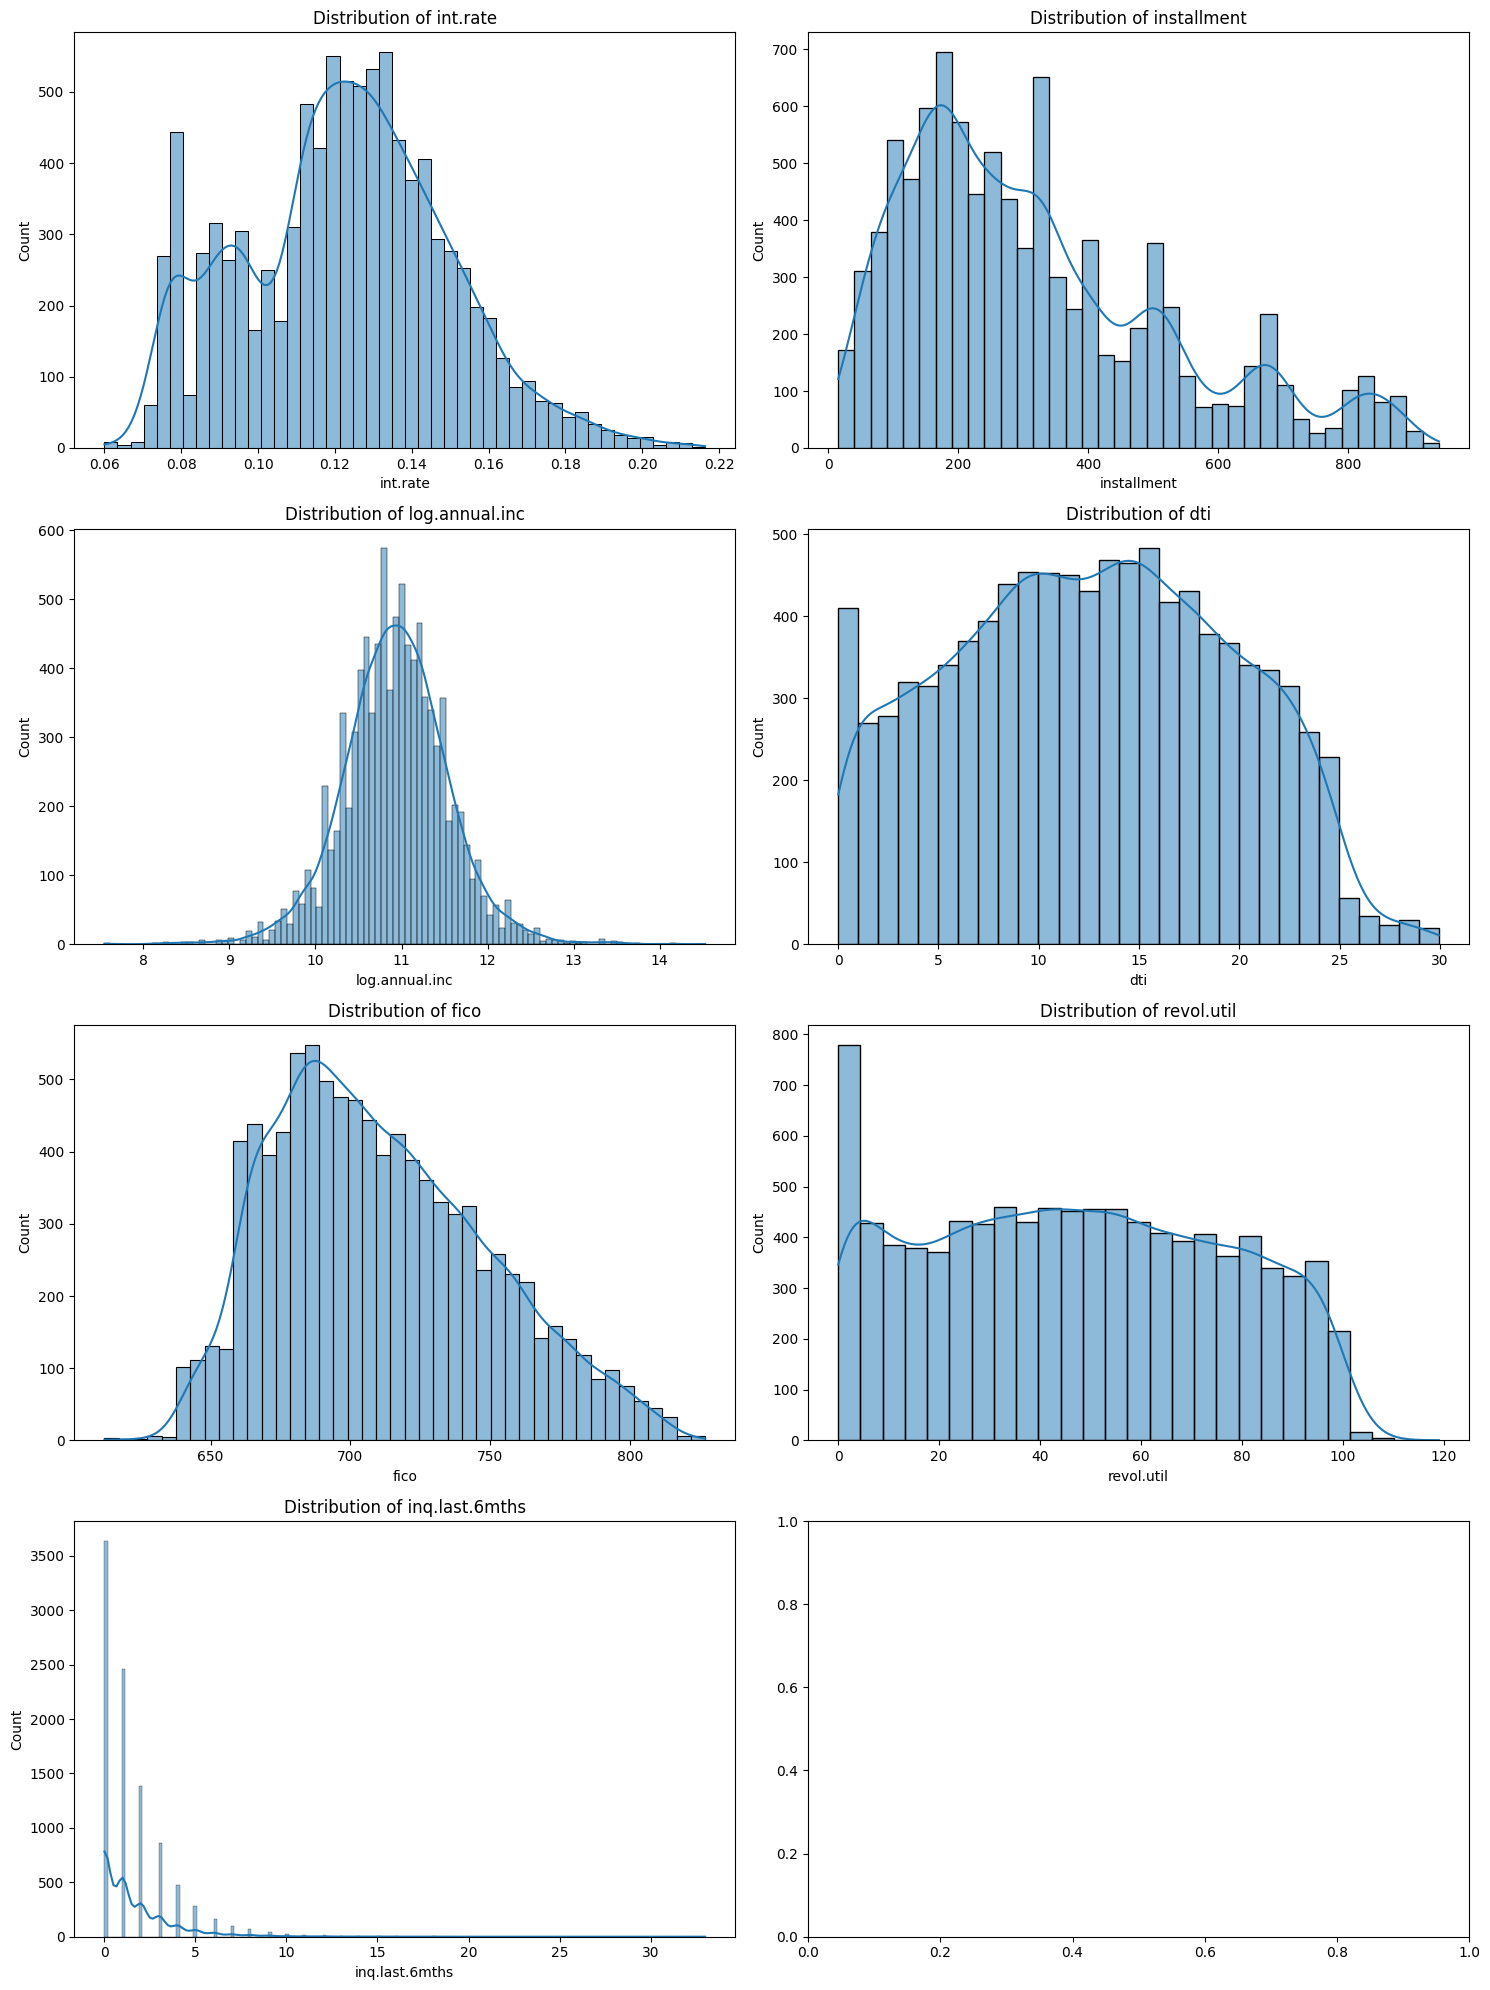

In [21]:
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 
                     'dti', 'fico', 'revol.util', 'inq.last.6mths']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

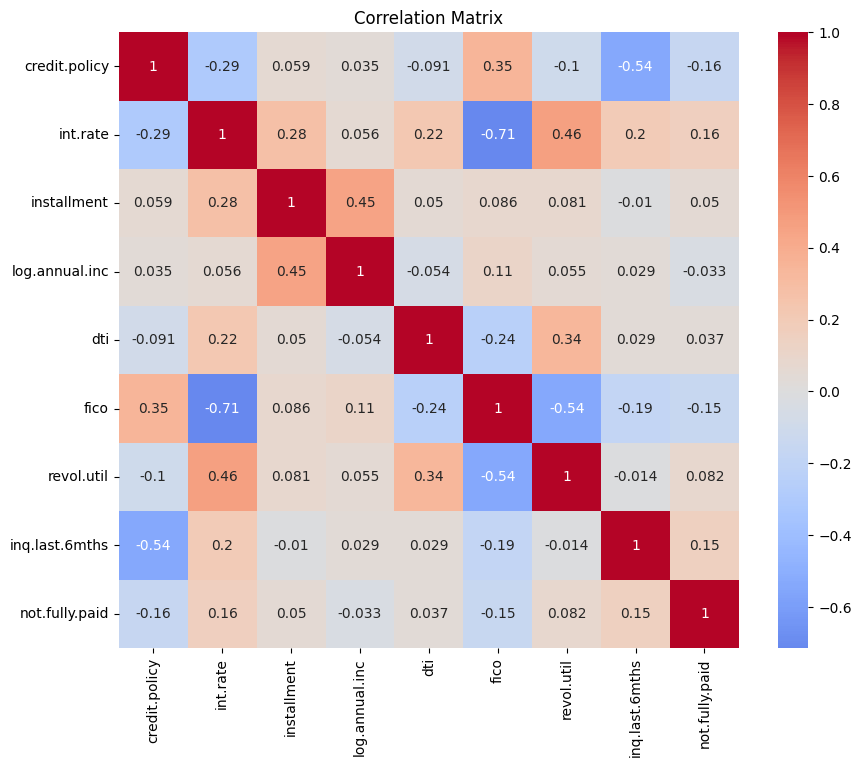

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

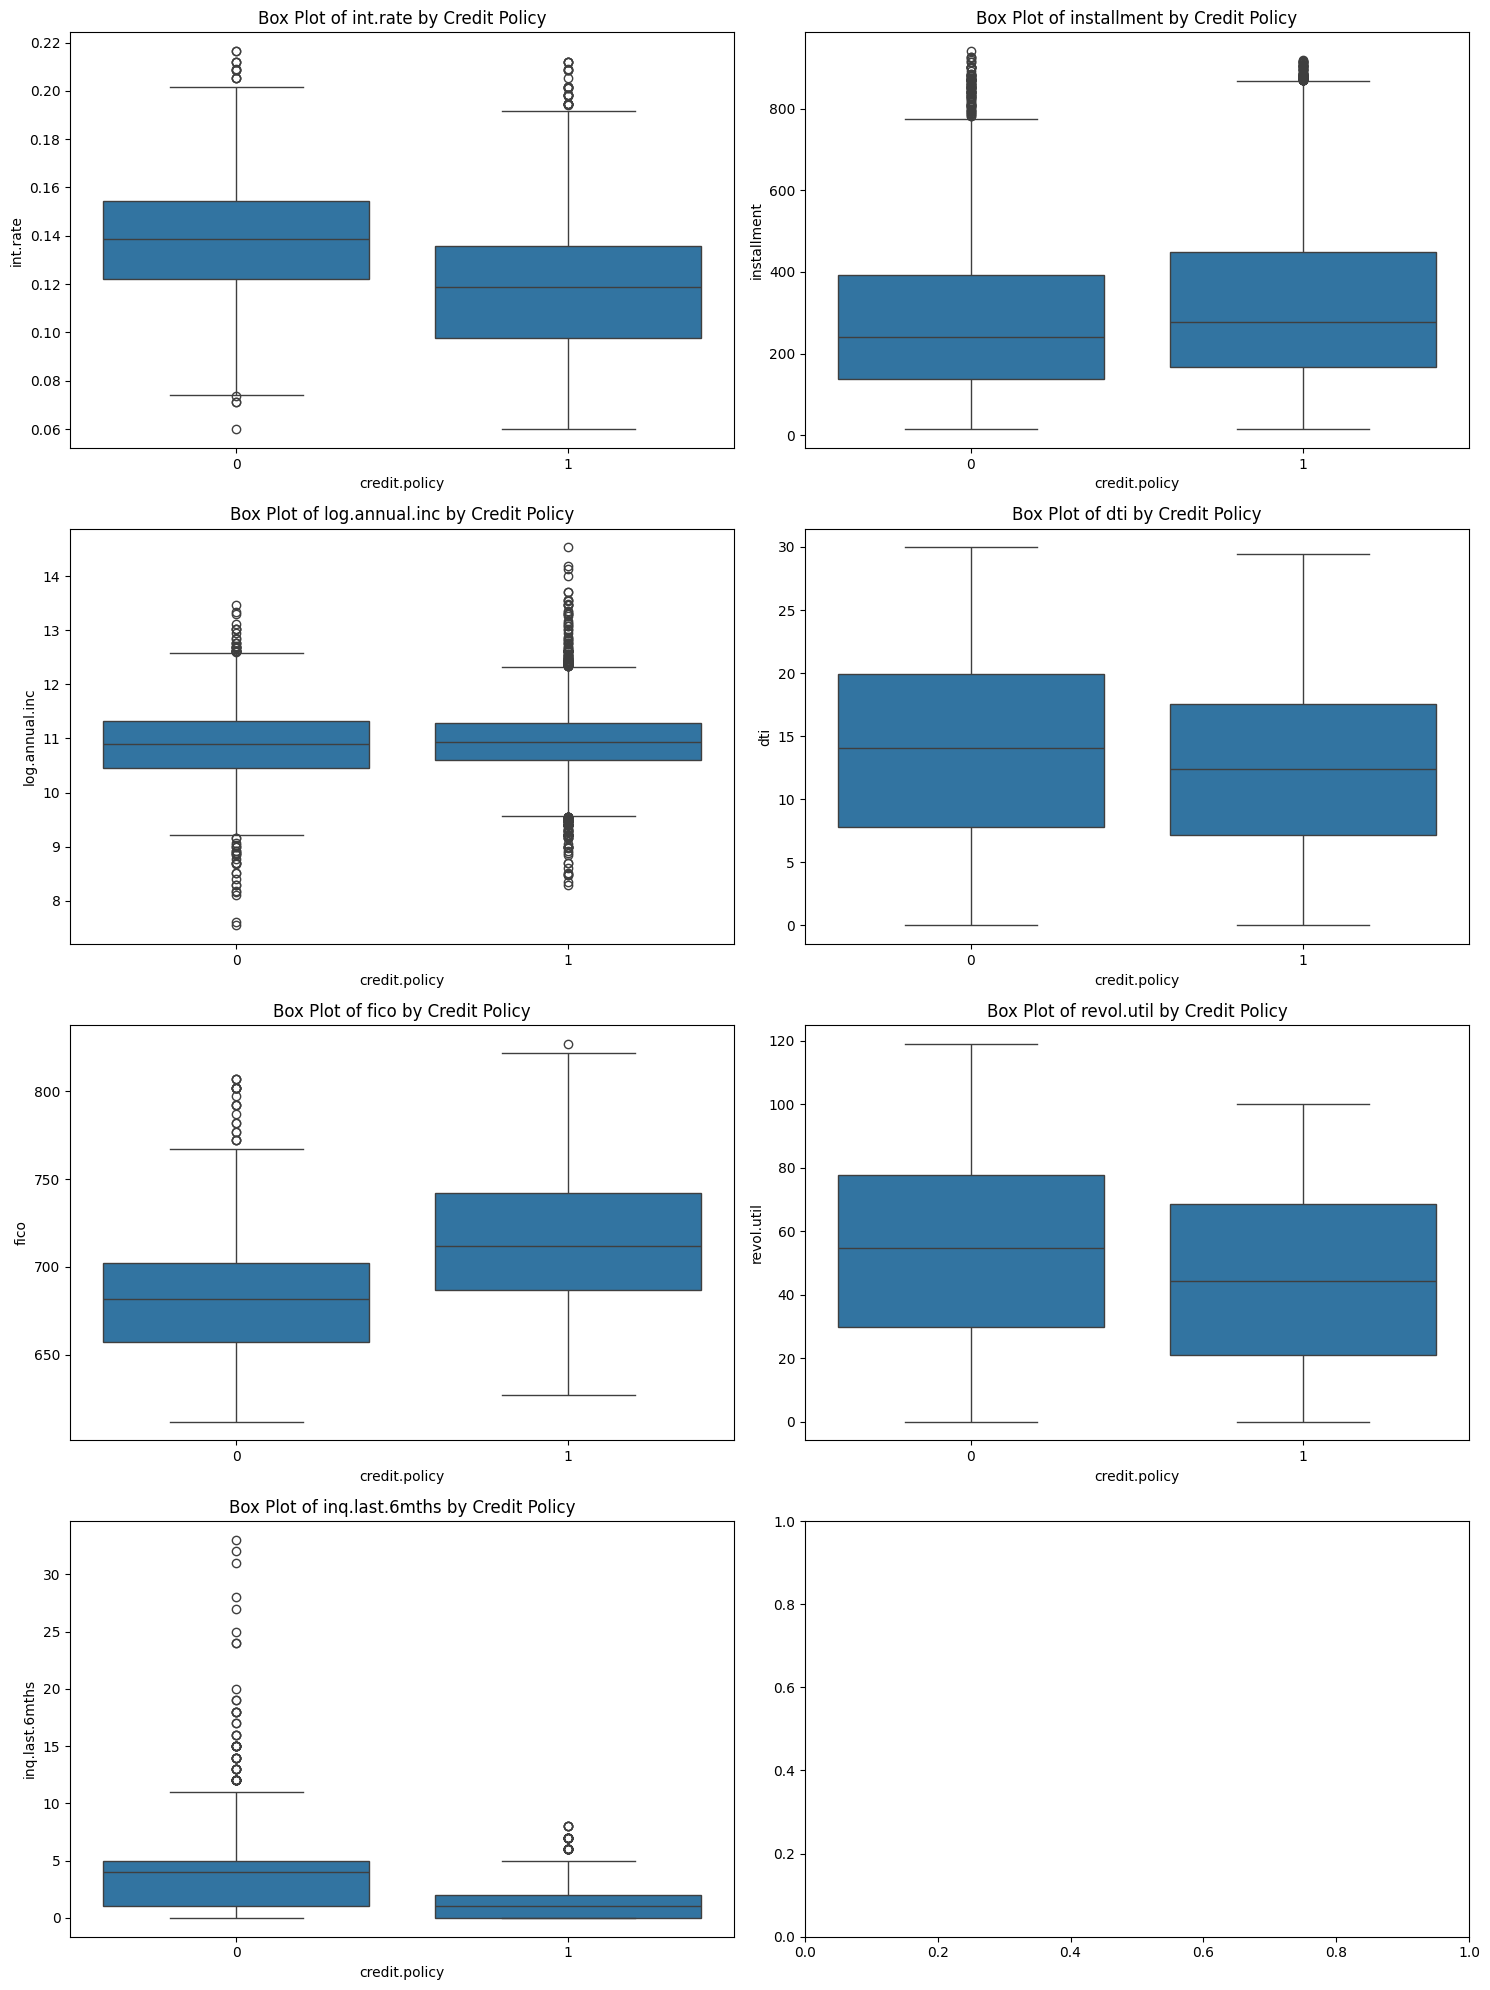

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, x='credit.policy', ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {feature} by Credit Policy')
    
plt.tight_layout()
plt.show()

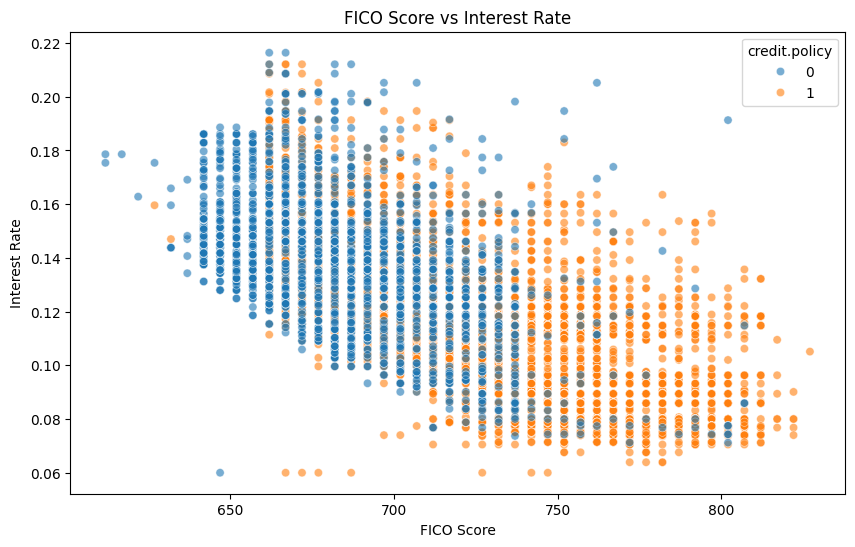

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fico', y='int.rate', hue='credit.policy', alpha=0.6)
plt.title('FICO Score vs Interest Rate')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

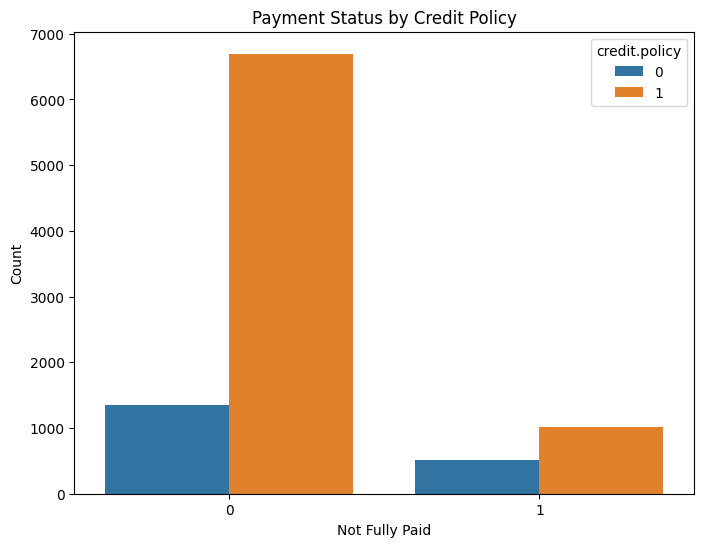

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='not.fully.paid', hue='credit.policy', data=df)
plt.title('Payment Status by Credit Policy')
plt.xlabel('Not Fully Paid')
plt.ylabel('Count')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
X = df.drop(['credit.policy', 'not.fully.paid'], axis=1)
y = df['credit.policy']

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [29]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

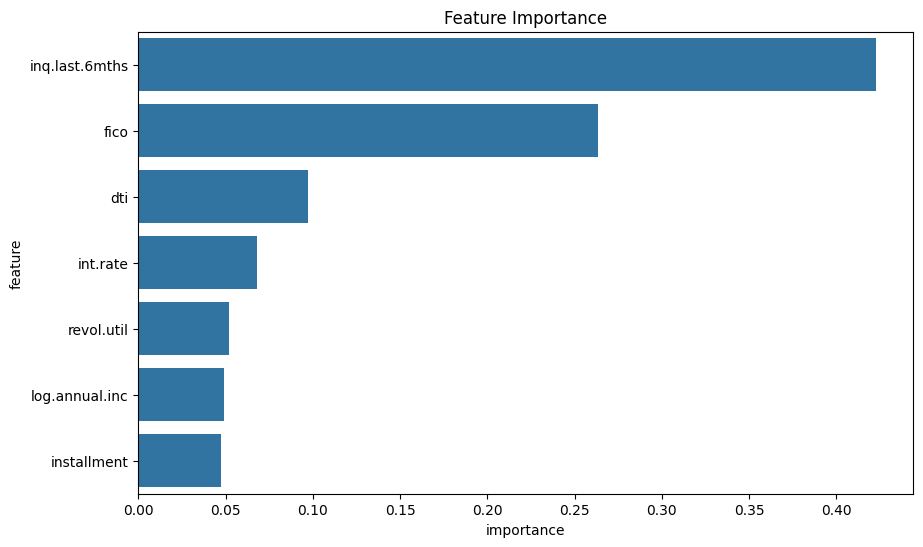

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [31]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
          feature  importance
6  inq.last.6mths    0.423043
4            fico    0.263183
3             dti    0.097167
0        int.rate    0.067995
5      revol.util    0.052002
2  log.annual.inc    0.049200
1     installment    0.047411
